In [23]:
# client_simulation_multiple_attributes.py
import requests
import numpy as np
import json
from datetime import datetime

# Updated SERVER_URL using your provided ngrok URL.
SERVER_URL = "https://7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app/ModelTraining"
num_attempts = 10  # Number of attempts per scenario

# The valid attributes expected by the server
VALID_CLIENT = "pi_1"
VALID_LOCATION = "home1"
VALID_STATUS = "active"

# Results dictionary for the predefined attack scenarios.
results = {
    "unauthorized_access": [],
    "model_poisoning": {"legit": [], "poison": []},
    "time_based_violation": [],
    "location_spoofing": []
}

# Results list for multiple attribute combinations.
multi_attr_results = []

def send_request(payload):
    try:
        # Note: verify=False is used here because the ngrok URL uses a certificate that might not be verified.
        response = requests.post(SERVER_URL, json=payload, verify=False)
        return {
            "payload": payload,
            "status_code": response.status_code,
            "response": response.json(),
            "timestamp": datetime.now().isoformat()
        }
    except Exception as e:
        return {
            "payload": payload,
            "status_code": None,
            "response": str(e),
            "timestamp": datetime.now().isoformat()
        }

def test_unauthorized_access():
    # For a valid request, the attributes should be:
    # client: "pi_1", location: "home1", status: "active"
    # Here, we simulate unauthorized access by using an invalid client.
    payload = {
        "client": "pi_2",  # Invalid client
        "status": VALID_STATUS,
        "timestamp": datetime.now().isoformat(),
        "location": VALID_LOCATION
    }
    return send_request(payload)

def test_model_poisoning():
    # Simulate a legitimate update with random model weights.
    legit_update = np.random.rand(10).tolist()
    payload_legit = {
        "client": VALID_CLIENT,
        "status": VALID_STATUS,
        "update": legit_update,
        "timestamp": datetime.now().isoformat(),
        "location": VALID_LOCATION
    }
    # Simulate a poisoned update by amplifying the update values.
    update = np.random.rand(10).tolist()
    poisoned_update = [w * 1.5 for w in update]
    payload_poison = {
        "client": VALID_CLIENT,
        "status": VALID_STATUS,
        "update": poisoned_update,
        "timestamp": datetime.now().isoformat(),
        "location": VALID_LOCATION
    }
    legit_resp = send_request(payload_legit)
    poison_resp = send_request(payload_poison)
    return legit_resp, poison_resp

def test_time_based_violation():
    # Simulate a time-based violation by setting the timestamp outside the allowed window.
    payload = {
        "client": VALID_CLIENT,
        "status": VALID_STATUS,
        "timestamp": datetime.now().replace(hour=3, minute=0, second=0, microsecond=0).isoformat(),
        "location": VALID_LOCATION
    }
    return send_request(payload)

def test_location_spoofing():
    # Simulate location spoofing by using an unauthorized location.
    payload = {
        "client": VALID_CLIENT,
        "status": VALID_STATUS,
        "timestamp": datetime.now().isoformat(),
        "location": "unauthorized_location"  # Spoofed location
    }
    return send_request(payload)

def run_predefined_simulations():
    for i in range(num_attempts):
        print(f"--- Predefined Simulation Attempt {i+1}/{num_attempts} ---")

        # Unauthorized Access Test
        unauthorized_resp = test_unauthorized_access()
        results["unauthorized_access"].append(unauthorized_resp)

        # Model Poisoning Test
        legit_resp, poison_resp = test_model_poisoning()
        results["model_poisoning"]["legit"].append(legit_resp)
        results["model_poisoning"]["poison"].append(poison_resp)

        # Time-based Violation Test
        time_violation_resp = test_time_based_violation()
        results["time_based_violation"].append(time_violation_resp)

        # Location Spoofing Test
        location_spoofing_resp = test_location_spoofing()
        results["location_spoofing"].append(location_spoofing_resp)

    # Write predefined simulation results to a JSON file.
    with open("simulation_results.json", "w") as outfile:
        json.dump(results, outfile, indent=4)
    print("Predefined simulation complete. Results saved to simulation_results.json")

def test_multiple_attributes():
    # Define multiple attribute values to test combinations.
    clients = [VALID_CLIENT, "pi_2", "pi_3"]
    locations = [VALID_LOCATION, "unauthorized_location", "home2"]
    statuses = [VALID_STATUS, "inactive", "error"]

    for client in clients:
        for loc in locations:
            for stat in statuses:
                payload = {
                    "client": client,
                    "status": stat,
                    "timestamp": datetime.now().isoformat(),
                    "location": loc
                }
                response = send_request(payload)
                multi_attr_results.append({
                    "attributes": {"client": client, "status": stat, "location": loc},
                    "response": response
                })
    return multi_attr_results

def run_multiple_attribute_simulation():
    print("--- Running Multiple Attribute Combinations Simulation ---")
    test_multiple_attributes()
    # Write the multiple attribute test results to a separate JSON file.
    with open("simulation_multiple_attributes.json", "w") as outfile:
        json.dump(multi_attr_results, outfile, indent=4)
    print("Multiple attribute simulation complete. Results saved to simulation_multiple_attributes.json")

if __name__ == "__main__":
    run_predefined_simulations()
    run_multiple_attribute_simulation()



--- Predefined Simulation Attempt 1/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

--- Predefined Simulation Attempt 2/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

--- Predefined Simulation Attempt 3/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

--- Predefined Simulation Attempt 4/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

--- Predefined Simulation Attempt 5/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

--- Predefined Simulation Attempt 6/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

--- Predefined Simulation Attempt 7/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

--- Predefined Simulation Attempt 8/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

--- Predefined Simulation Attempt 9/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

--- Predefined Simulation Attempt 10/10 ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

Predefined simulation complete. Results saved to simulation_results.json
--- Running Multiple Attribute Combinations Simulation ---


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-

Multiple attribute simulation complete. Results saved to simulation_multiple_attributes.json


/Users/sohanurrahman/Desktop/College/Research_2025/venv/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host '7abc-2600-4041-5592-500-cf8b-dcef-644-172f.ngrok-free.app'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


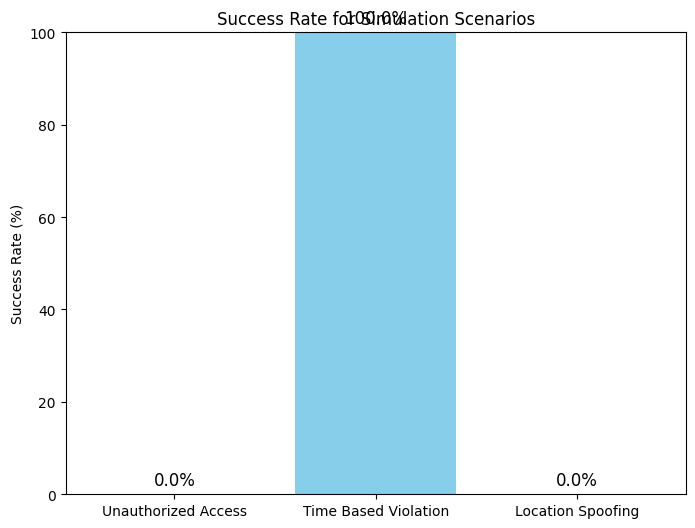

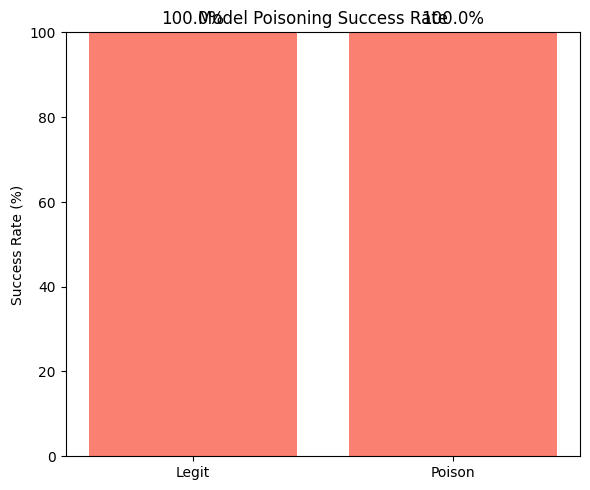

In [24]:
import json
import matplotlib.pyplot as plt

def load_json(filename):
    with open(filename, "r") as f:
        return json.load(f)

def compute_success_rate(entries):
    """
    Compute the percentage of attempts with status_code == 200.
    Modify this function if a different criteria is desired.
    """
    successes = sum(1 for entry in entries if entry.get("status_code") == 200)
    total = len(entries)
    return (successes / total * 100) if total > 0 else 0

# Load simulation results from file.
results = load_json("simulation_results.json")

# For these scenarios, the results are stored as lists.
list_scenarios = ["unauthorized_access", "time_based_violation", "location_spoofing"]

list_success_rates = {}
for scenario in list_scenarios:
    entries = results.get(scenario, [])
    rate = compute_success_rate(entries)
    list_success_rates[scenario] = rate

# Model poisoning results are assumed to be stored in a dict with keys "legit" and "poison".
model_poisoning = results.get("model_poisoning", {})
model_poisoning_rates = {}
for sub in ["legit", "poison"]:
    entries = model_poisoning.get(sub, [])
    model_poisoning_rates[sub] = compute_success_rate(entries)

# --- Plotting the results ---

# Create a bar chart for the non-model-poisoning scenarios.
fig, ax = plt.subplots(figsize=(8, 6))
scenarios = list(list_success_rates.keys())
rates = [list_success_rates[sc] for sc in scenarios]
bars = ax.bar([sc.replace('_', ' ').title() for sc in scenarios], rates, color="skyblue")
ax.set_title("Success Rate for Simulation Scenarios")
ax.set_ylabel("Success Rate (%)")
ax.set_ylim(0, 100)
for bar, rate in zip(bars, rates):
    ax.text(bar.get_x() + bar.get_width() / 2, rate + 2, f"{rate:.1f}%", ha="center", fontsize=12)

# Create a separate bar chart for model poisoning results.
fig2, ax2 = plt.subplots(figsize=(6, 5))
poisoning_categories = list(model_poisoning_rates.keys())
poisoning_rates = [model_poisoning_rates[sub] for sub in poisoning_categories]
bars2 = ax2.bar([sub.title() for sub in poisoning_categories], poisoning_rates, color="salmon")
ax2.set_title("Model Poisoning Success Rate")
ax2.set_ylabel("Success Rate (%)")
ax2.set_ylim(0, 100)
for bar, rate in zip(bars2, poisoning_rates):
    ax2.text(bar.get_x() + bar.get_width() / 2, rate + 2, f"{rate:.1f}%", ha="center", fontsize=12)

plt.tight_layout()
plt.show()



